Based on our previous Notebooks, our hypothesis is:
The drastic change in AtliQ's sales was due to a high demand for hardware for the return to school post-pandemic in Latin America, a demand that AtliQ was able to supply and capitalize on.
Let's find something in the data that helps us identify certain trends.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format='{:,.2f}'.format
df = pd.read_csv('../../data/interim/LATAM_mar-dec.csv')
df.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Atliq e Store,E-Commerce,Direct,Brazil,2021-03-01,4,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,78.09
1,Amazon,E-Commerce,Retailer,Mexico,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
2,Amazon,E-Commerce,Retailer,Chile,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
3,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
4,Atliq e Store,E-Commerce,Direct,Brazil,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30


In [5]:
df['date'] = pd.to_datetime(df['date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           6495 non-null   object        
 1   platform           6495 non-null   object        
 2   channel            6495 non-null   object        
 3   market             6495 non-null   object        
 4   date               6495 non-null   datetime64[ns]
 5   sold_quantity      6495 non-null   int64         
 6   division           6495 non-null   object        
 7   segment            6495 non-null   object        
 8   category           6495 non-null   object        
 9   product            6495 non-null   object        
 10  variant            6495 non-null   object        
 11  total_gross_sales  6495 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 609.0+ KB


In [20]:
df['category'].value_counts()

category
Personal Laptop    2083
Business Laptop    1383
Graphic Card       1334
Gaming Laptop       949
Processors          746
Name: count, dtype: int64

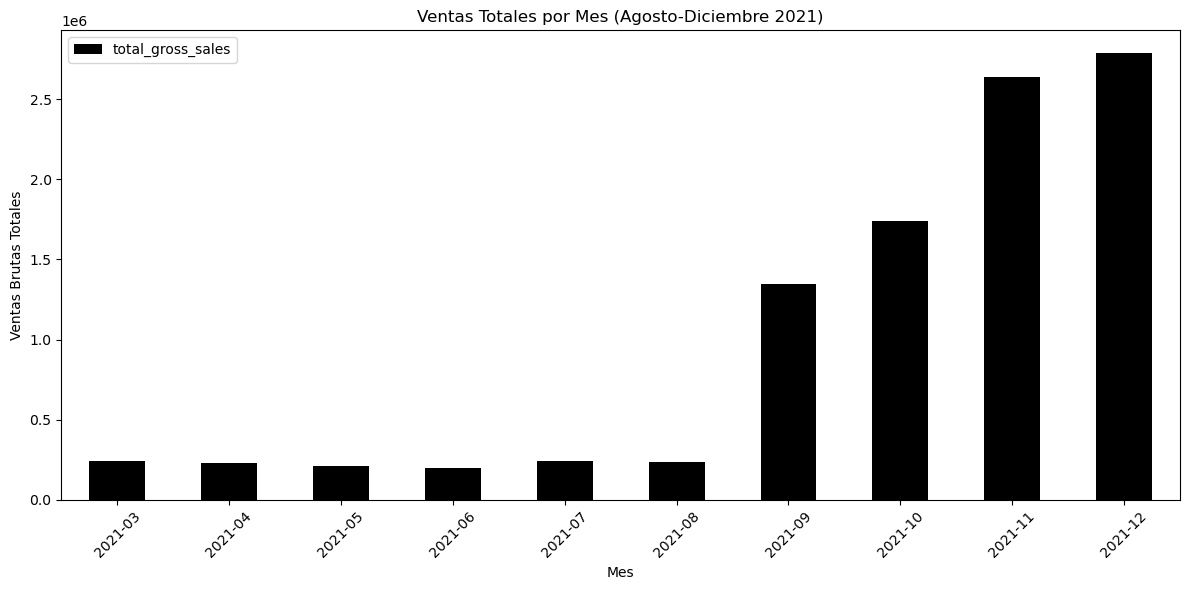

In [7]:
# Agrupando las ventas totales por mes
sales_by_month = df.groupby(df['date'].dt.to_period("M")).agg({'total_gross_sales': 'sum'})

# Graficando las ventas totales por mes
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='bar', ax=plt.gca(), color='black')
plt.title('Ventas Totales por Mes (Agosto-Diciembre 2021)')
plt.ylabel('Ventas Brutas Totales')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can clearly see the trend, right?
It occurs to me that we can segment the data based on this period to uncover some insights.



In [22]:
data_pre_august = df[df['date'] < '2021-08-01']

top_products_pre = data_pre_august.groupby('product').agg({
    'sold_quantity': 'sum',
    'total_gross_sales': 'sum'
}).sort_values(by='total_gross_sales', ascending=False)

# Mostrando los 10 productos más vendidos en base a la cantidad vendida
top_products_pre.head(10)

,sold_quantity,total_gross_sales
product,,
AQ BZ Allin1,124,"87,973.48"
AQ Gen Y,176,"62,010.14"
AQ Gen X,192,"61,565.99"
AQ BZ Gen Y,125,"61,148.83"
AQ BZ Gen Z,116,"60,968.38"
AQ BZ Compact,129,"59,995.38"
AQ Electron 4 3600 Desktop Processor,309,"52,274.78"
AQ Electron 5 3600 Desktop Processor,325,"49,637.36"
AQ Elite,168,"48,131.98"


In [27]:
top10_products_pre = top_products_pre.head(10).index

In [34]:
data_pre_august.loc[data_pre_august['product'].isin(top10_products_pre)]['segment'].value_counts()

segment
Notebook       826
Peripherals    207
Desktop        124
Name: count, dtype: int64

In [35]:
data_pre_august.loc[data_pre_august['product'].isin(top10_products_pre)]['category'].value_counts()

category
Business Laptop    494
Personal Laptop    456
Processors         207
Name: count, dtype: int64

In [21]:
data_post_august = df[df['date'] >= '2021-08-01']
top_products = data_post_august.groupby('product').agg({
    'total_gross_sales': 'sum',
    'sold_quantity': 'sum'
}).sort_values(by='total_gross_sales', ascending=False)
top_products.head(10)

,total_gross_sales,sold_quantity
product,,
AQ BZ Allin1 Gen 2,"618,495.60",767
AQ Smash 2,"505,362.95",715
AQ Smash 1,"501,388.11",767
AQ Gamer 2,"461,787.43",739
AQ BZ Allin1,"434,852.50",582
AQ Electron 3 3600 Desktop Processor,"424,083.18",2075
AQ Electron 4 3600 Desktop Processor,"400,730.39",2257
AQ BZ Compact,"391,513.35",813
AQ BZ Gen Z,"373,607.53",671


In [37]:
top10_products_post = top_products.head(10).index
data_post_august.loc[data_post_august['product'].isin(top10_products_post)]['segment'].value_counts()

segment
Notebook       1453
Desktop         400
Peripherals     248
Name: count, dtype: int64

In [38]:
data_post_august.loc[data_post_august['product'].isin(top10_products_post)]['category'].value_counts()

category
Business Laptop    742
Gaming Laptop      456
Processors         133
Name: count, dtype: int64

Look! These data points are quite interesting! Before August, the best sellers were:

1. Business Laptops
2. Personal Laptops
3. Processors  

After August, the top sellers were:

1. Business Laptops
2. Gaming Laptops
3. Processors.
We can clearly see from the data that notebooks are the biggest profit generators for the company!


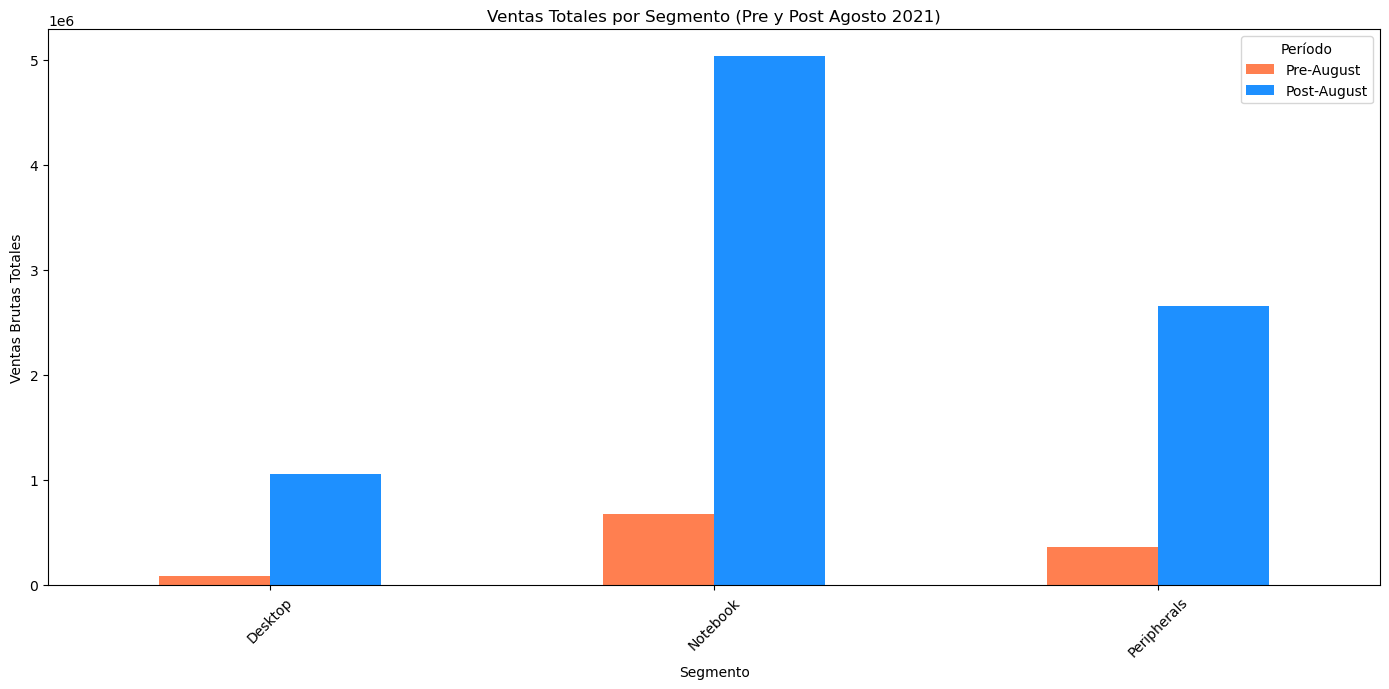

In [42]:
sales_by_segment_pre = data_pre_august.groupby('segment').agg({'total_gross_sales': 'sum'})
sales_by_segment_post = data_post_august.groupby('segment').agg({'total_gross_sales': 'sum'})

# Combinando los datos en un único DataFrame
sales_by_segment_combined = pd.concat([sales_by_segment_pre, sales_by_segment_post], axis=1)
sales_by_segment_combined.columns = ['Pre-August', 'Post-August']

# Graficando nuevamente las ventas por segmento para los dos períodos
sales_by_segment_combined.plot(kind='bar', figsize=(14, 7), color=['coral', 'dodgerblue'])
plt.title('Ventas Totales por Segmento (Pre y Post Agosto 2021)')
plt.ylabel('Ventas Brutas Totales')
plt.xlabel('Segmento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Período')
plt.show()

In [43]:
df.query("segment=='Notebook'")

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
1,Amazon,E-Commerce,Retailer,Mexico,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
2,Amazon,E-Commerce,Retailer,Chile,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
3,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
4,Atliq e Store,E-Commerce,Direct,Brazil,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Misty Green,467.30
5,Amazon,E-Commerce,Retailer,Brazil,2021-03-01,1,PC,Notebook,Business Laptop,AQ BZ Compact,Premium Black,475.19
...,...,...,...,...,...,...,...,...,...,...,...,...
6489,Amazon,E-Commerce,Retailer,Chile,2021-12-01,1,PC,Notebook,Business Laptop,AQ BZ Gen Y,Standard Blue,473.82
6490,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-12-01,6,PC,Notebook,Business Laptop,AQ BZ Gen Y,Standard Blue,"2,842.95"
6491,Atliq e Store,E-Commerce,Direct,Brazil,2021-12-01,6,PC,Notebook,Business Laptop,AQ BZ Gen Y,Standard Blue,"2,842.95"
6492,Atliq e Store,E-Commerce,Direct,Mexico,2021-12-01,6,PC,Notebook,Business Laptop,AQ BZ Gen Y,Standard Blue,"2,842.95"




### Conclusion:
The initial hypothesis suggested that the drastic change in AtliQ's sales was due to a high demand for hardware for the return to school in Latin America, and that AtliQ was able to supply and capitalize on this.

Based on the analysis of the data provided:

1. AtliQ's total sales showed a significant increase in August and September of 2021, supporting the idea of a surge in hardware demand during the back-to-school period in LATAM.

2. Hardware-related categories, such as Electronics, Computers, and Software, experienced a sharp increase in sales in the post-August period, indicating a growing demand for tools and devices for online learning and work.

3. E-commerce platforms, particularly Amazon and Atliq e Store, dominated sales during this period. This could indicate a preference for online shopping, possibly due to post-pandemic circumstances and the return to school in an online or hybrid format.